## Разреженная матрица
   Идея: введём параметр, который будет представлять собой ненулевое число элементов в матрице A. Тогда для случая $C_{ij}^{kl} = \delta_{ij}\delta_{kl}$ проведём расчёт. 
   Замечание: далее будет использована функция создания разреженной матрицы со случайно расположенными ненулевыми элементами.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy
import math

In [13]:
def Diag_matrix(sigma, size_row, size_col, alpha):
    A = np.zeros((size_row, size_col))
    for i in range(min(size_row,size_col)):
            A[i,i] = sigma*np.random.randn()
    return A

In [14]:
def sparse_matrix(sigma, size_row, size_col, alpha):

    H = sigma*scipy.sparse.random(size_row, size_col, density=alpha/size_row, random_state=None, data_rvs=np.random.randn)
    return H.A

In [15]:
def rho_th(p, sigma, alpha, N):
    lam_max = 1/N*alpha*(sigma*(np.sqrt(p)+1))**2
    lam_min = 1/N*alpha*(sigma*(np.sqrt(p)-1))**2
    lam = np.linspace(lam_min, lam_max, 200)
    if lam_min == 0:  # avoid division by 0
        lam = lam[1:]
    rho = N/2/np.pi/p/alpha/sigma**2*np.sqrt((lam - lam_min)*(lam_max - lam))/lam
    
    return lam, rho

In [16]:
def g_th(p, sigma):
    w_max = sigma*(np.sqrt(p)+1)
    w_min = sigma*np.abs(np.sqrt(p)-1)
    w = np.linspace(w_min, w_max, 1000)
    if w_min == 0:  # avoid division by 0
        w = w[1:]
    g = 1/np.pi/p/sigma**2*np.sqrt((w**2 - w_min**2)*(w_max**2 - w**2))/w

    return w, g

In [17]:
eigval = dict()

In [45]:
N = 1000
sigma = 1
alpha_1 = 80
Ks = [N/2, N, 100*N]
for K in Ks:
#for K in kpm.Progress(Ks):
        A = sparse_matrix(sigma, N, int(K), alpha_1)
        M = A.dot(A.T)/K
        p = N/K
        eigval[p] = np.linalg.eigvals(M)

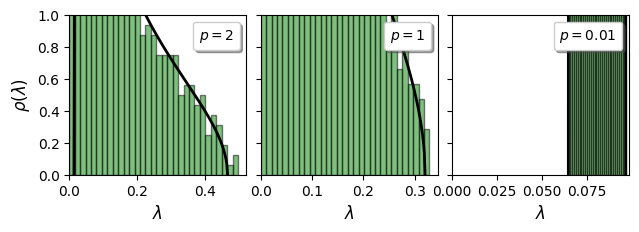

In [46]:
fig = plt.figure(figsize=(7, 2))
gs = gridspec.GridSpec(1, 3)
fig.subplots_adjust(0.1, 0.1, 0.9, 0.9, 0.08)

Li = [(x,y) for x in Ks for y in alpha_list]

for i, K in enumerate(Ks):
        ax = fig.add_subplot(gs[i])
        p = N/K
        plt.hist(eigval[p], bins = int(np.sqrt(N)), density = True, alpha = 0.5, color = 'g', ec='black')
        lam, rho = rho_th(p, sigma, alpha_1, N)
        plt.plot(lam, rho, color='k', lw=2, label=r'$p=%g$' %p )
        plt.legend(loc='upper right', handlelength=0, handletextpad=0, shadow=True)
        plt.ylim(0, 1)
        plt.xlim(0, None)
        plt.xlabel(r'$\lambda$',fontsize=12)
    
        if (i==0):
            plt.ylabel(r'$\rho(\lambda)$',fontsize=12)
        else:
            plt.setp(ax.get_yticklabels(), visible=False)
        
    #ax.add_artist(AnchoredText(r'$p=%g$' %p, loc='upper left', frameon=True))

## Вывод
Исходя из полученных результатов, теоретическая плотность, начиная с $\alpha$ порядка 60, даёт отклонения от гистограммы собственных значений разреженной матрицы. Это возможно связано с тем, что для теории в матрице A все столбцы заполнены $\alpha$ не нулевыми элементами, а для гистограммы распределение элементов в матрице случайно.

In [142]:
rl = ['a','d']
rk = ['e','r','t']
rkl = [(x,y) for x in rl for y in rk]
#for i in range(len(['a','b','c'])*len(['e','r'])):
 #   for K in ['a','b','c']:
  #      for q in ['e','r']:
   #         print(i, K, q)
for j, (f,g) in enumerate(rkl):
    print(j, f, g)
print(math.ceil(2/3))

0 a e
1 a r
2 a t
3 d e
4 d r
5 d t
1
